In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from wordcloud import WordCloud
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
from scipy.stats import boxcox
import warnings
from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse


warnings.filterwarnings('ignore')

In [2]:
diabetes_df = pd.read_csv('data/diabetes.csv')
diabetes_df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
diabetes_df.isnull().sum()*100/diabetes_df.isnull().count()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

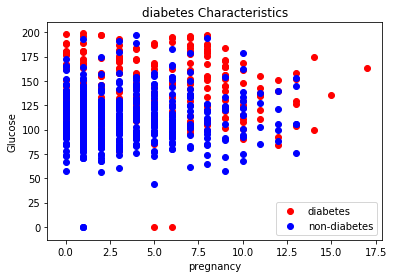

In [4]:
# Look at our data.
plt.scatter(
    diabetes_df[diabetes_df['Outcome'] == 1].Pregnancies,
    diabetes_df[diabetes_df['Outcome'] == 1].Glucose,
    color='red'
)
plt.scatter(
    diabetes_df[diabetes_df['Outcome'] == 0].Pregnancies,
    diabetes_df[diabetes_df['Outcome'] == 0].Glucose,
    color='blue'
)
plt.legend(['diabetes', 'non-diabetes'])
plt.title('diabetes Characteristics')
plt.xlabel('pregnancy')
plt.ylabel('Glucose')
plt.show()

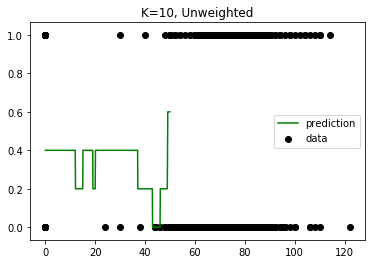

In [11]:
from sklearn import neighbors
# KNN regression 

#features=list(zip(diabetes_df.Pregnancies,diabetes_df.Glucose))# Build our model.

knn = neighbors.KNeighborsRegressor(n_neighbors=5)
X = pd.DataFrame(diabetes_df.BloodPressure)
Y = diabetes_df.Outcome
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Unweighted Accuracy: 0.08 (+/- 0.20)


In [6]:
# OLS regression

# Y is the target variable
Y = diabetes_df.Outcome
# X is the feature set which includes
# is_male and is_smoker variables
X = diabetes_df.iloc[:,0:7]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 2.50330374e-02  6.10742203e-03 -2.06053086e-03 -4.02881034e-05
 -1.92918996e-04  1.31618072e-02  1.51537347e-01]

Intercept: 
 -0.8196197890821446


In [7]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     46.67
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           4.22e-55
Time:                        01:02:26   Log-Likelihood:                -383.36
No. Observations:                 768   AIC:                             782.7
Df Residuals:                     760   BIC:                             819.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8196      0.083     -9.857      0.000      -0.983      -0.656
Pregnancies                  0.0250      0.004      5.672      0.000       0.016       0.034
Glucose                      0.0061      0.001     12.124      0.000       0.005       0.007
BloodPressure               -0.0021      0.001     -2.587      0.010      -0.004      -0.000
SkinThickness            -4.029e-05      0.001     -0.036      0.971      -0.002       0.002
Insulin                     -0.0002      0.000     -1.288      0.198      -0.000       0.000
BMI                          0.0132      0.002      6.298      0.000       0.009       0.017
DiabetesPedigreeFunction     0.1515      0.045      3.365      0.001       0.063       0.240
==============================================================================
Omnibus:                       41.190   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.275
Skew:                           0.425   Prob(JB):                     5.95e-08
Kurtosis:                       2.437   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""